In [1]:
## Library ##

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import pickle

In [6]:
## Import dataset ##

df_segmentation = pd.read_csv("C:/Users/Admin/OneDrive/Máy tính/dataset/Kaggle seg.csv", index_col = 0)

In [7]:
df_segmentation.head()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
Customer ID,,,,,,,,,,,,,,,,,,,
84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [8]:
## - CHECK SHAPE
df_segmentation.shape

(53503, 19)

In [9]:
## - dROP NULL VALUE
df_segmentation.dropna()

,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
Customer ID,,,,,,,,,,,,,,,,,,,
84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4


In [10]:
df_segmentation.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53503 entries, 84966 to 62125
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 53503 non-null  int64 
 1   Gender                              53503 non-null  object
 2   Marital Status                      53503 non-null  object
 3   Education Level                     53503 non-null  object
 4   Geographic Information              53503 non-null  object
 5   Occupation                          53503 non-null  object
 6   Income Level                        53503 non-null  int64 
 7   Behavioral Data                     53503 non-null  object
 8   Purchase History                    53503 non-null  object
 9   Interactions with Customer Service  53503 non-null  object
 10  Insurance Products Owned            53503 non-null  object
 11  Coverage Amount                     53503 non-null  int

In [11]:
df_segmentation.describe()

,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000
mean,44.140945,82768.324318,492580.789638,3023.702447
std,15.079486,36651.075670,268405.505571,1285.834295
min,18.000000,20001.000000,50001.000000,500.000000
25%,32.000000,51568.500000,249613.500000,1817.000000
50%,43.000000,80719.000000,477261.000000,3194.000000
75%,57.000000,115973.500000,739124.000000,4311.500000
max,70.000000,149999.000000,1000000.000000,5000.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income Level'}>],
       [<Axes: title={'center': 'Coverage Amount'}>,
        <Axes: title={'center': 'Premium Amount'}>]], dtype=object)

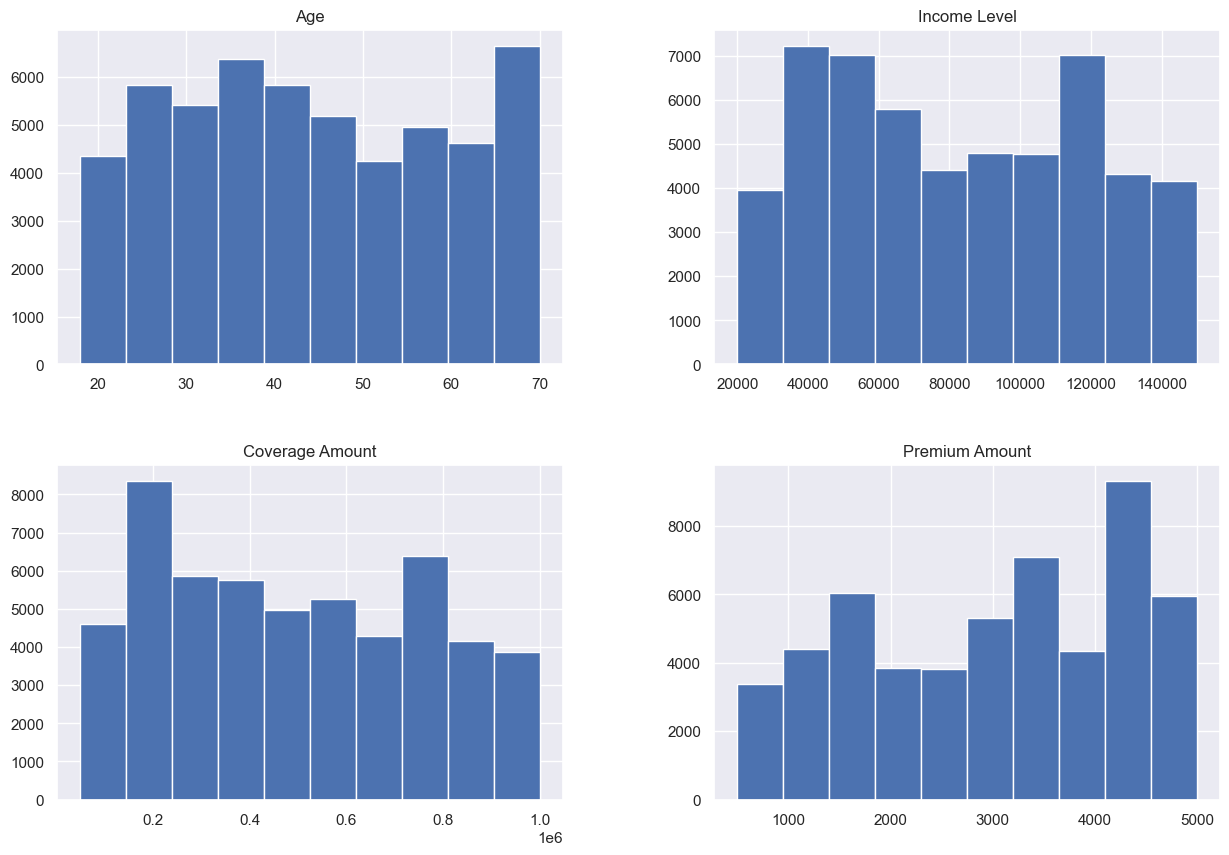

In [61]:
df_segmentation.hist(figsize=(15, 10))

In [12]:
df_segmentation.isnull().sum()

Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

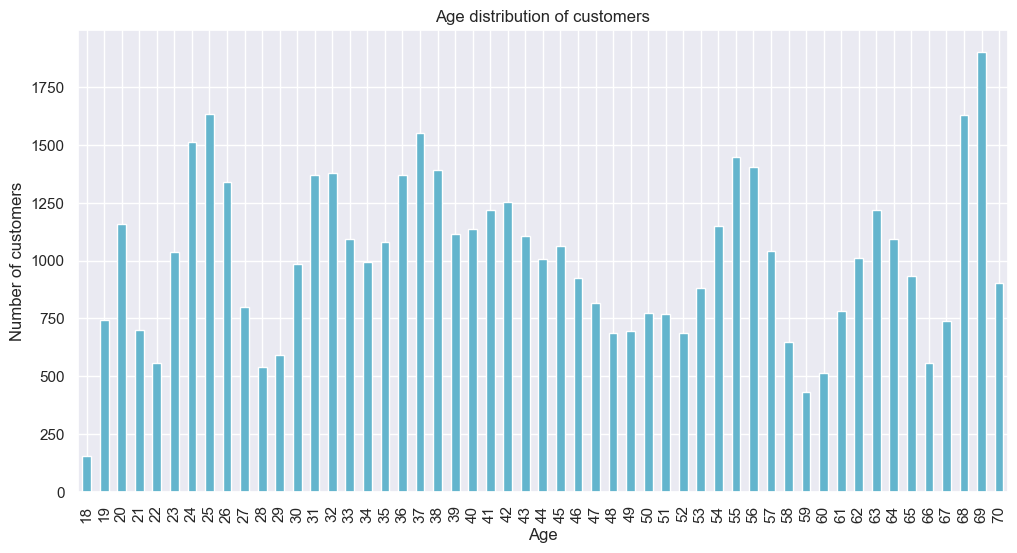

Age distribution of customers:
Age: 18, number of customers: 154
Age: 19, number of customers: 744
Age: 20, number of customers: 1156
Age: 21, number of customers: 700
Age: 22, number of customers: 556
Age: 23, number of customers: 1038
Age: 24, number of customers: 1511
Age: 25, number of customers: 1635
Age: 26, number of customers: 1341
Age: 27, number of customers: 801
Age: 28, number of customers: 542
Age: 29, number of customers: 593
Age: 30, number of customers: 983
Age: 31, number of customers: 1371
Age: 32, number of customers: 1379
Age: 33, number of customers: 1092
Age: 34, number of customers: 993
Age: 35, number of customers: 1081
Age: 36, number of customers: 1368
Age: 37, number of customers: 1550
Age: 38, number of customers: 1391
Age: 39, number of customers: 1113
Age: 40, number of customers: 1137
Age: 41, number of customers: 1217
Age: 42, number of customers: 1254
Age: 43, number of customers: 1107
Age: 44, number of customers: 1008
Age: 45, number of customers: 106

In [35]:
# plot Age Distribution:

age_distribution= df_segmentation['Age'].value_counts().sort_index()
plt.figure(figsize=(12,6))
age_distribution.plot(kind='bar', color='c')
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.show()
# print age distribution

print('Age distribution of customers:')
for age, count in age_distribution.items():
    print(f'Age: {age}, number of customers: {count}')

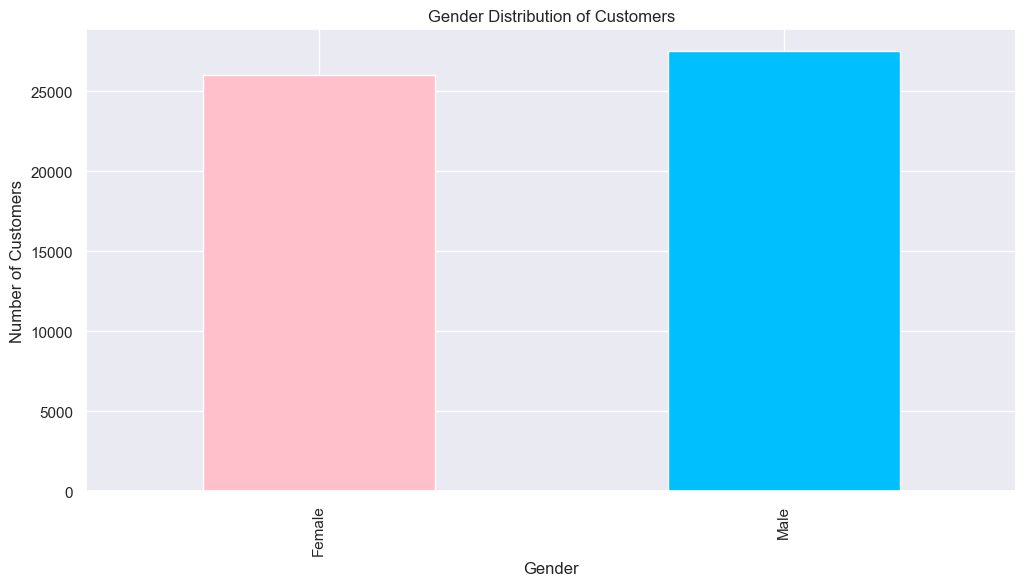

Gender Distribution of Customers
Female: 26004
Male: 27499


In [32]:
# Plot the gender Distribution
gender_distribution = df_segmentation['Gender'].value_counts().sort_index()
plt.figure(figsize=(12,6))

# Create a color list based on gender values
colors = ['deepskyblue' if gender == 'Male' else 'pink' for gender in gender_distribution.index]

gender_distribution.plot(kind='bar', color=colors)
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Print gender distribution of customers
print('Gender Distribution of Customers')
for gender, count in gender_distribution.items():
    print(f'{gender}: {count}')

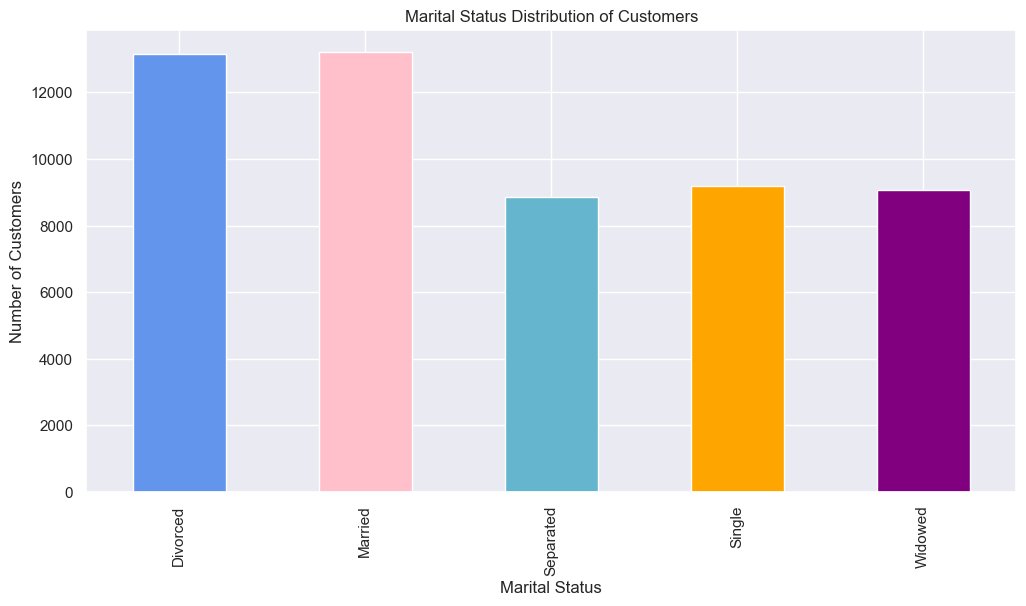

Marital Status Distribution of Customers
Marital Status: Divorced, Number of customers: 13151
Marital Status: Married, Number of customers: 13219
Marital Status: Separated, Number of customers: 8861
Marital Status: Single, Number of customers: 9195
Marital Status: Widowed, Number of customers: 9077


In [44]:
# Plot the marital status Distribution
marital_status_distribution = df_segmentation['Marital Status'].value_counts().sort_index()
plt.figure(figsize=(12,6))

# Define a list of colors for each marital status
colors = ['cornflowerblue', 'pink', 'c', 'orange', 'purple']

# Plot the bar chart with specified colors
marital_status_distribution.plot(kind='bar', color=colors)
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

# Print marital status distribution of customers
print('Marital Status Distribution of Customers')
for marital_status, count in marital_status_distribution.items():
    print(f'Marital Status: {marital_status}, Number of customers: {count}')

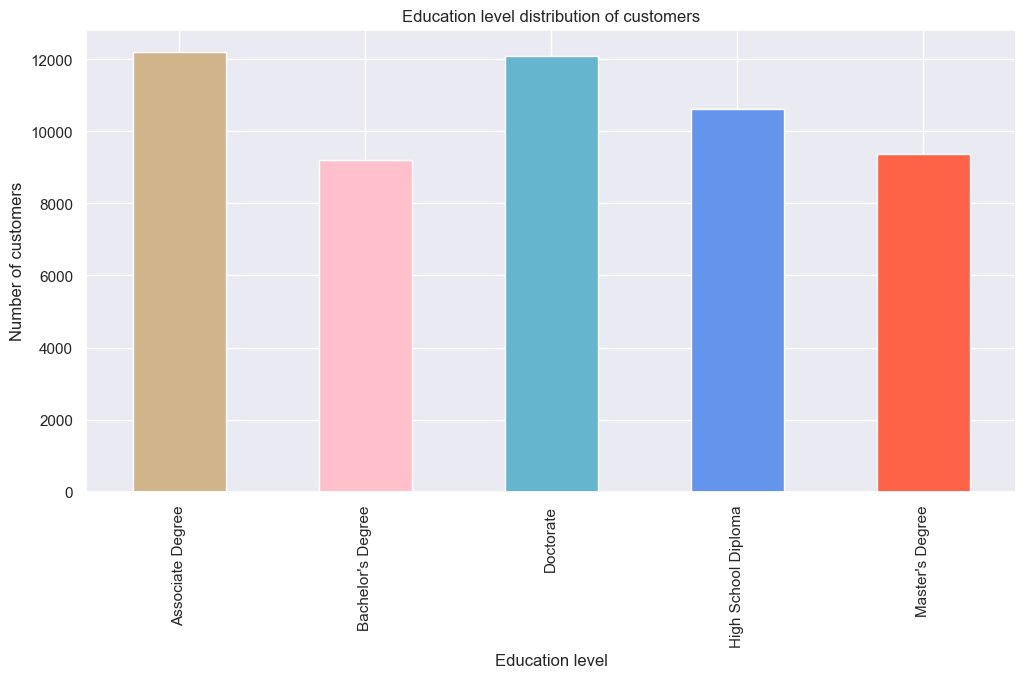

Education level distribution of customers:
Education level : Associate Degree, number of customer: 12213
Education level : Bachelor's Degree, number of customer: 9214
Education level : Doctorate, number of customer: 12103
Education level : High School Diploma, number of customer: 10607
Education level : Master's Degree, number of customer: 9366


In [52]:
# plot the EDucation level Distibution of customers
education_distribution = df_segmentation ['Education Level'].value_counts().sort_index()
plt.figure(figsize=(12,6))

# Define a list of colors for each marital status
colors = ['tan', 'pink', 'c', 'cornflowerblue', 'tomato']

education_distribution.plot(kind='bar', color=colors)
plt.title('Education level distribution of customers')
plt.xlabel('Education level')
plt.ylabel('Number of customers')
plt.show()
# pritn the Education level distribution of customers 
print('Education level distribution of customers:')
for education, count in education_distribution.items():
    print(f'Education level : {education}, number of customer: {count}')

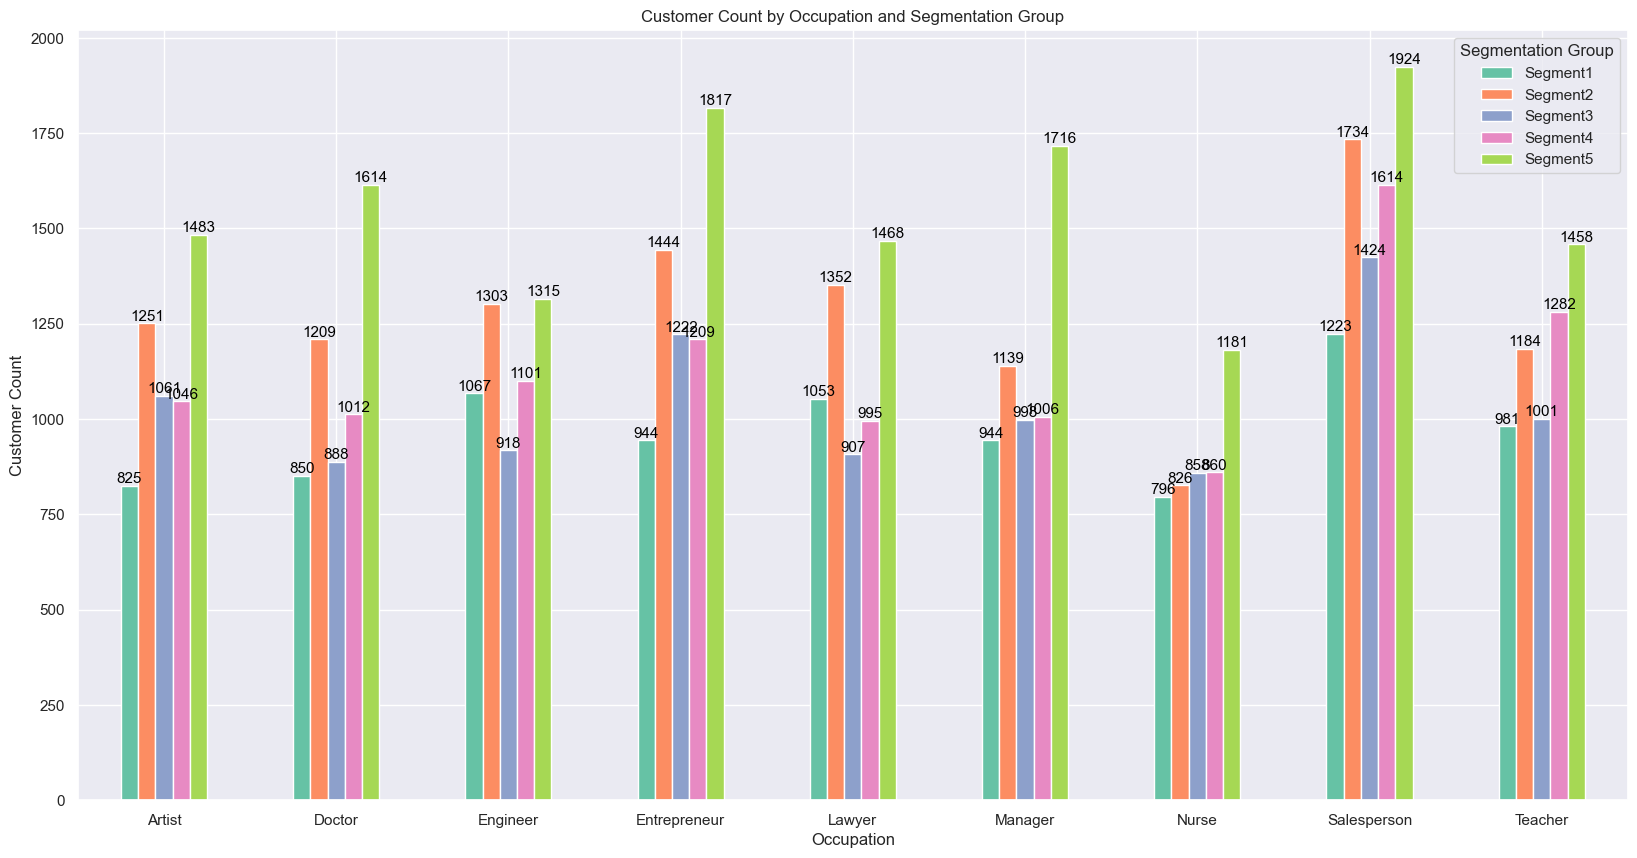

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a color palette with 5 colors
palette = sns.color_palette("Set2", 5)  # You can choose other palettes like "husl", "Paired", etc.

fig, ax = plt.subplots(figsize=(20, 10))

# Group by 'Occupation' and 'Segmentation Group', then count the number of customers
bar_plot = df_segmentation.groupby(["Occupation", "Segmentation Group"]).size().unstack().plot(kind='bar', ax=ax, color=palette)

ax.set_title('Customer Count by Occupation and Segmentation Group')  
ax.set_xlabel('Occupation')  
ax.set_ylabel('Customer Count') 

# Annotate bars with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.show()


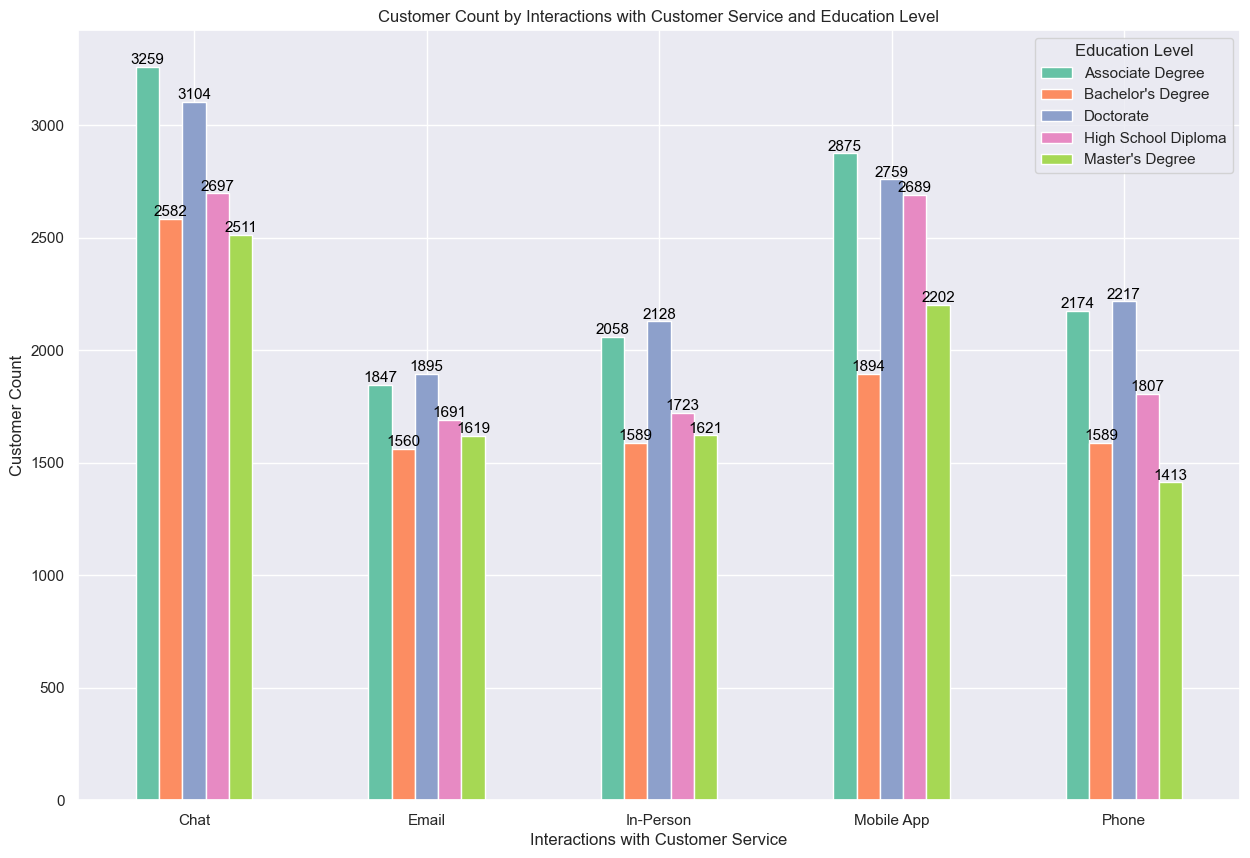

In [67]:
# Define a color palette with 5 colors
palette = sns.color_palette("Set2", 5)

fig, ax = plt.subplots(figsize=(15, 10))

# Group by 'Interactions with Customer Service' and 'Education Level', then count the number of customers
bar_plot = df_segmentation.groupby(["Interactions with Customer Service", "Education Level"]).size().unstack().plot(kind='bar', ax=ax, color=palette)

# Annotate bars with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
ax.set_title('Customer Count by Interactions with Customer Service and Education Level')
ax.set_xlabel('Interactions with Customer Service')
ax.set_ylabel('Customer Count')

plt.show()


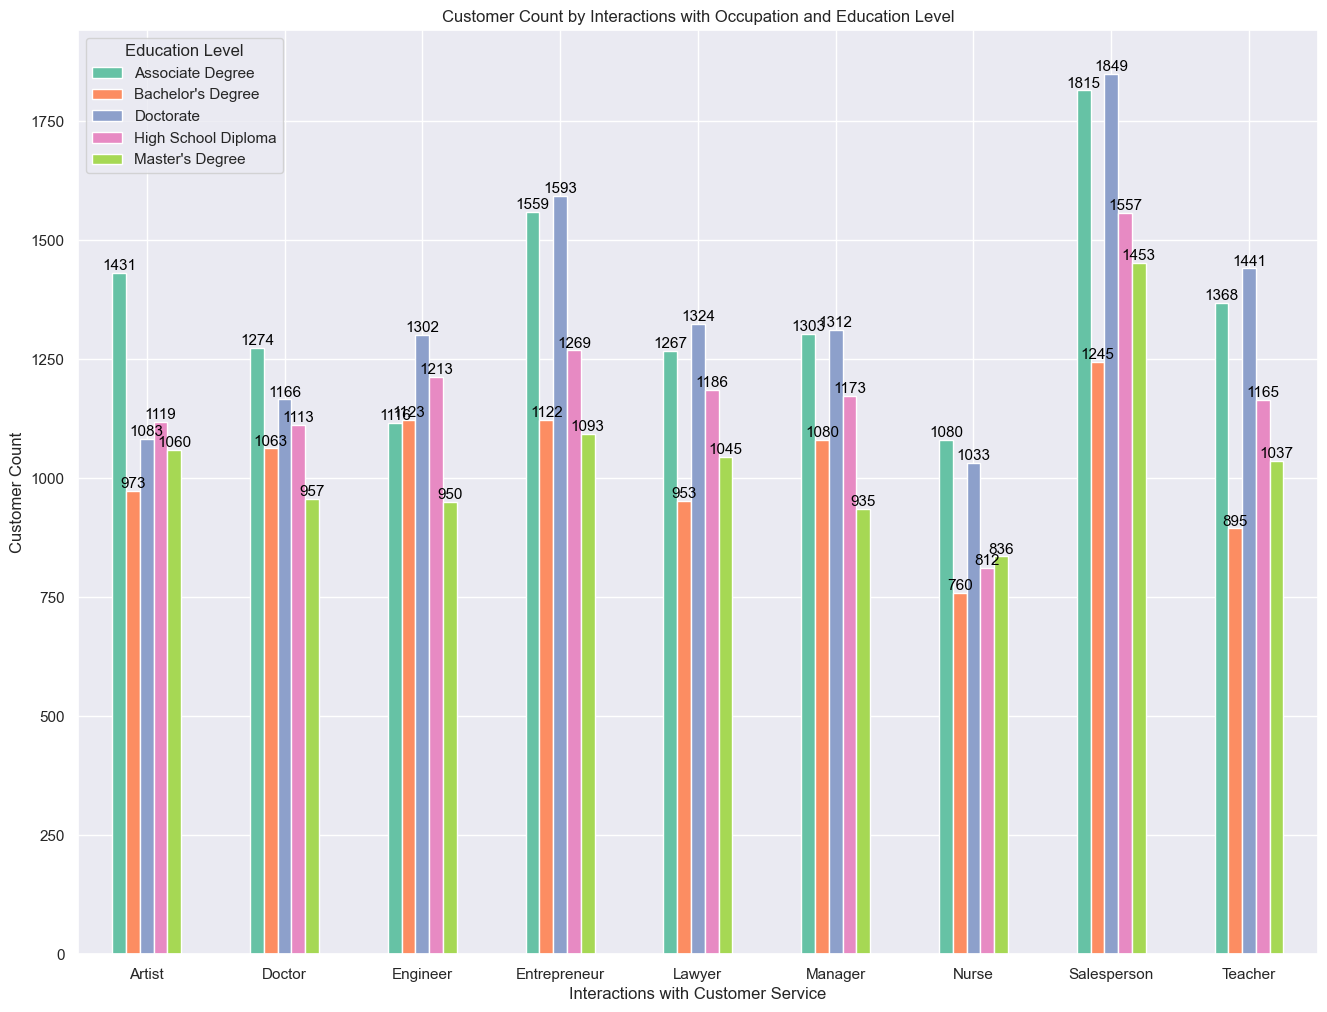

In [71]:
# Define a color palette with 5 colors
palette = sns.color_palette("Set2", 5)

fig, ax = plt.subplots(figsize=(16, 12))

# Group by 'Interactions with Customer Service' and 'Education Level', then count the number of customers
bar_plot = df_segmentation.groupby(["Occupation", "Education Level"]).size().unstack().plot(kind='bar', ax=ax, color=palette)

# Annotate bars with the count
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
ax.set_title('Customer Count by Interactions with Occupation and Education Level')
ax.set_xlabel('Interactions with Customer Service')
ax.set_ylabel('Customer Count')

plt.show()


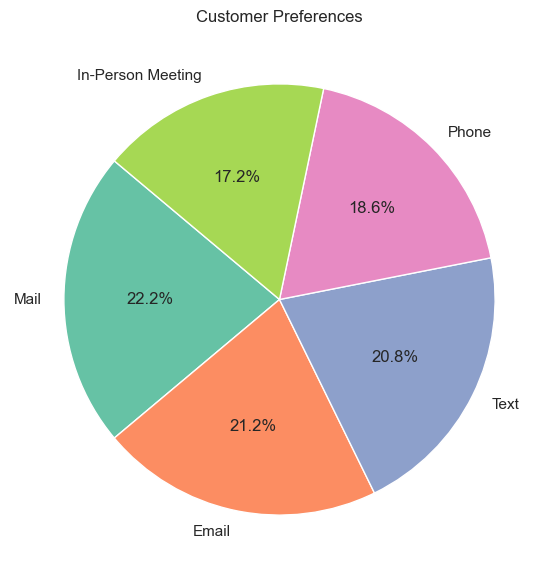

In [74]:
# Customer Preferences
geo_distribution = df_segmentation['Customer Preferences'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(geo_distribution, labels=geo_distribution.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))

plt.title('Customer Preferences')
plt.show()